In [1]:
from scipy import interpolate
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *


df = pd.read_csv('Facting_Data.csv')
df


,X_Axis,60,55,50,45,40,35,30,25
0,360,7.6821,7.3053,6.0619,7.6628,8.3848,9.2971,9.2372,8.6967
1,370,7.1166,7.0108,6.5378,7.7374,8.4002,9.1590,9.0612,7.8567
2,380,6.2423,6.3366,6.1613,6.9001,7.4425,8.1681,7.7771,6.9062
3,390,5.3379,5.5059,5.4587,5.8385,6.2378,6.7344,6.3799,5.7448
4,400,4.4369,4.5943,4.5685,4.7075,4.9636,5.3273,5.0153,4.4864
5,410,3.5337,3.6765,3.6402,3.7000,3.8173,4.1257,3.8898,3.4693
6,420,2.8664,3.0402,3.0192,3.0142,3.0933,3.3515,3.1961,2.8586
7,430,2.4889,2.7031,2.6770,2.6541,2.7015,2.9365,2.8073,2.5205
8,440,2.2590,2.4977,2.4587,2.4136,2.4313,2.6138,2.5083,2.2610
9,450,2.1903,2.4267,2.3690,2.2875,2.2590,2.4194,2.3193,2.0908


C:\QMDownload\anaconda\lib\site-packages\plotnine\facets\facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
C:\QMDownload\anaconda\lib\site-packages\plotnine\facets\facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead


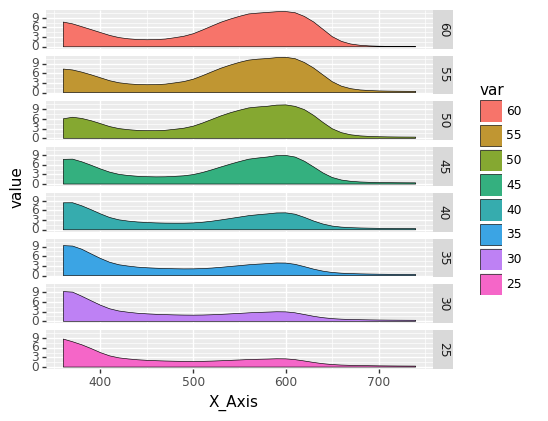

<ggplot: (119152869039)>


In [2]:
# ------------------------------------------(a)-----------------------------------------------
df_melt = pd.melt(df, id_vars='X_Axis', var_name='var', value_name='value')
df_melt['var'] = pd.Categorical(df_melt['var'], categories=np.unique(df_melt['var'])[::-1], ordered=True)

base_plot = (ggplot(df_melt, aes('X_Axis', 'value', fill='var')) +
             geom_area(color="black", size=0.25) +
             facet_grid('var~.') +
             scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl') +
             theme(aspect_ratio=0.1,
                   dpi=100,
                   figure_size=(5, 0.5)))
print(base_plot)


C:\QMDownload\anaconda\lib\site-packages\plotnine\facets\facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
C:\QMDownload\anaconda\lib\site-packages\plotnine\facets\facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead


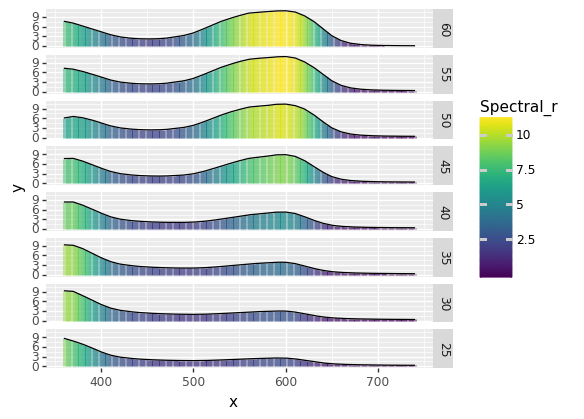

<ggplot: (119152944848)>


In [3]:
# ------------------------------------------(b)--------------------------------

mydata = pd.DataFrame(columns=['x', 'y', 'var'])

list_var = np.unique(df_melt['var'])
N = 300
for i in list_var:
    x = df.loc[:, 'X_Axis']
    y = df.loc[:, i]
    f = interpolate.interp1d(x, y)  # , kind='slinear')#kind='linear',

    x_new = np.linspace(np.min(x), np.max(x), N)
    y_new = f(x_new)
    mydata = mydata.append(pd.DataFrame(
        {'x': x_new, 'y': y_new, 'var': np.repeat(i, N)}))

mydata['var'] = pd.Categorical(mydata['var'], categories=np.unique(df_melt['var'])[::-1], ordered=True)

base_plot = (ggplot(mydata, aes('x', 'y', group='var')) +
             geom_bar(aes(fill='y'), color='none', size=0.5, stat="identity") +
             geom_line(color="black", size=0.5) +
             scale_fill_cmap(name='Spectral_r') +
             facet_grid('var~.') +
             theme(aspect_ratio=0.1,
                   dpi=100,
                   figure_size=(5, 0.5)))
print(base_plot)
